<a href="https://colab.research.google.com/github/julika333/TMS-DS/blob/main/lesson_28_Car_test/HW_28_3models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

car_price_data = pd.read_csv('/content/sample_data/CarPrice_Assignment.csv')
# df = cap_price_data.drop(['car_ID', 'CarName', 'symboling', 'compressionratio', 'stroke'], axis=1, inplace=True).copy()
# df.info()

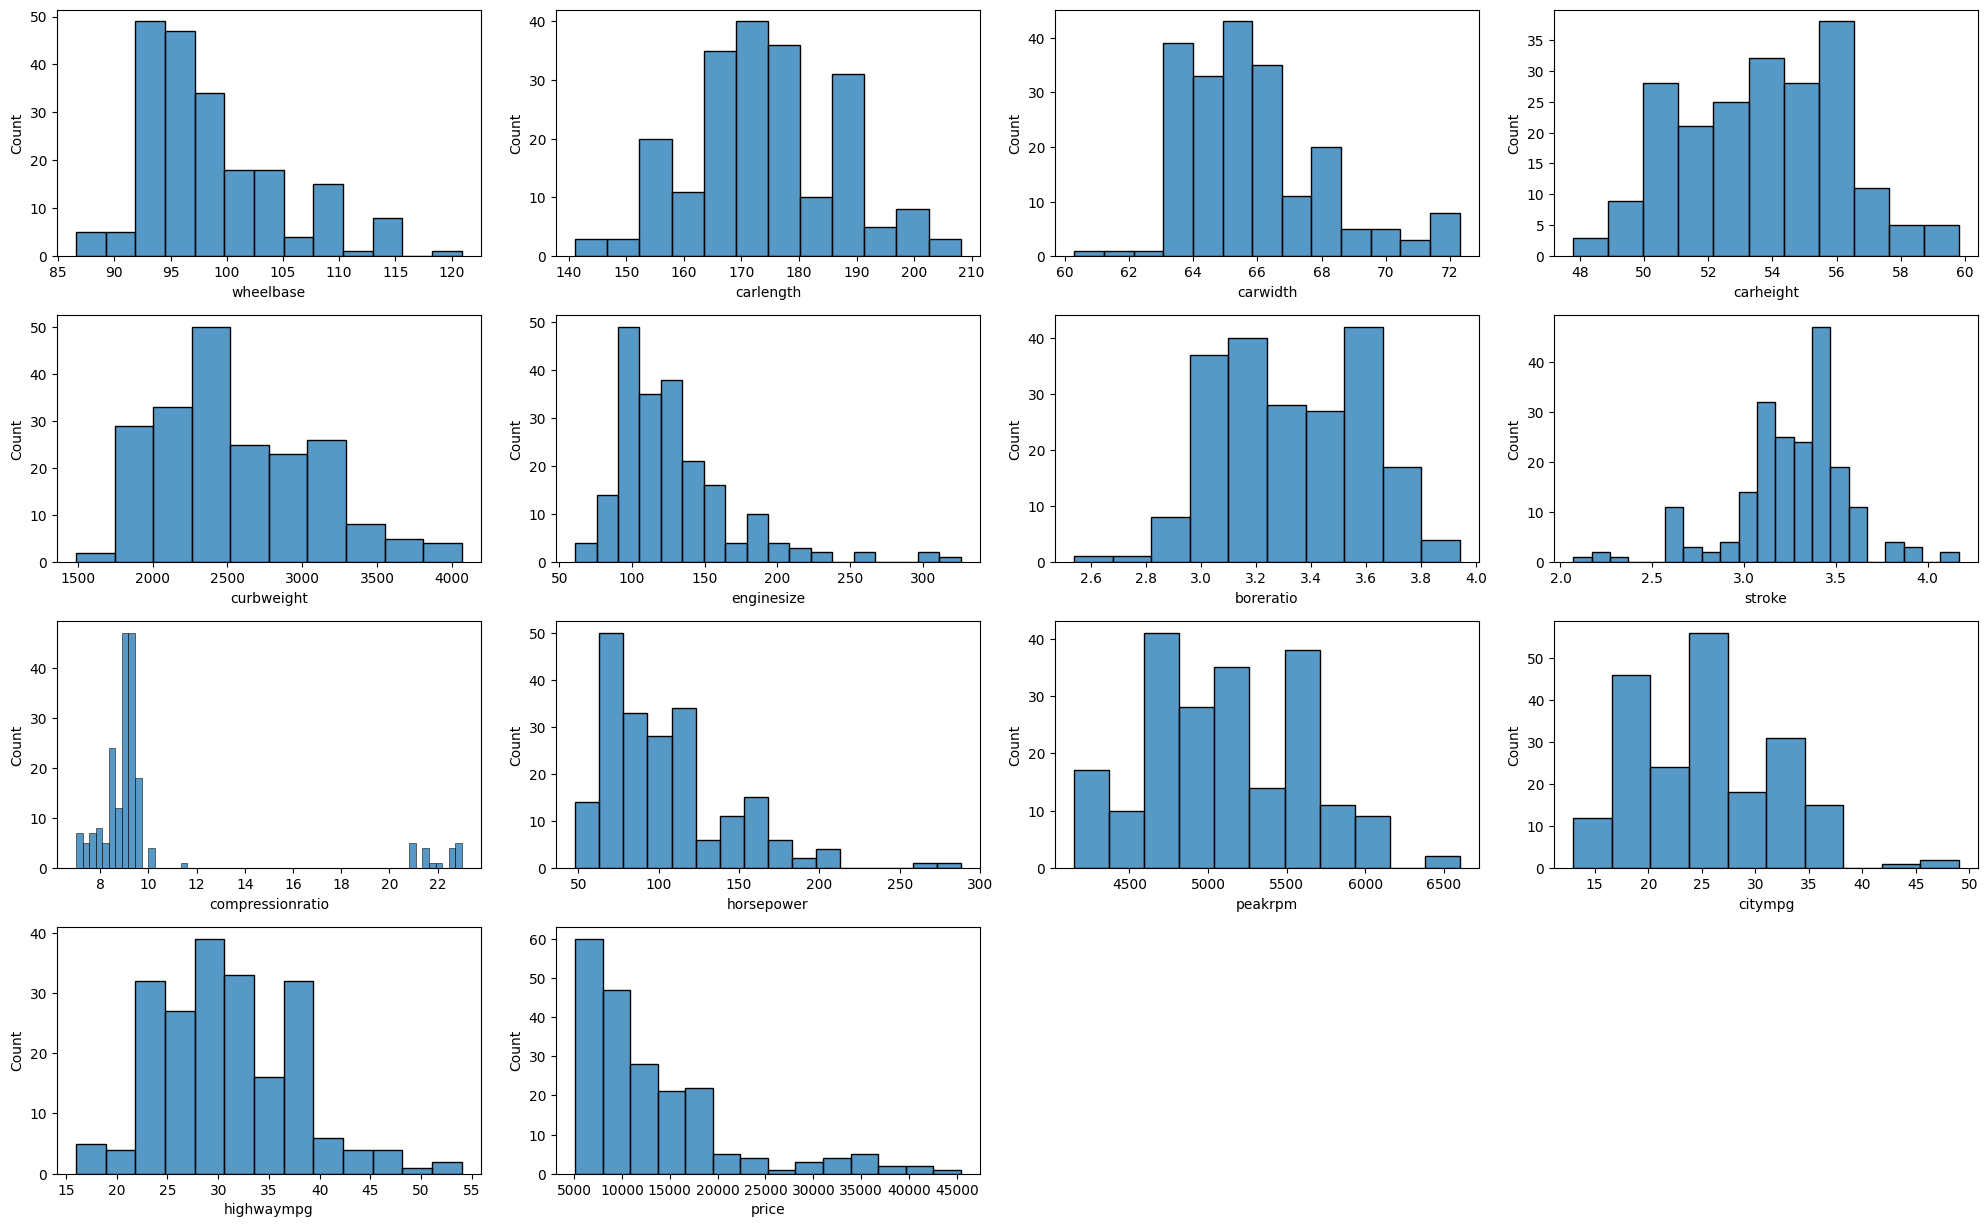

In [27]:
car_price_data.drop(['CarName','car_ID','symboling'], axis=1, inplace=True)

plt.figure(figsize = (20, 15))
plotnumber = 1
num_cols = [col for col in car_price_data.columns if car_price_data[col].dtype != 'object']

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(5, 4, plotnumber)
        skewness = car_price_data[column].skew()
        sns.histplot(car_price_data[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [28]:
y = car_price_data['price']
X = car_price_data.drop(columns=['price'])


In [29]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

In [25]:
categorical_features

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

In [75]:
def evaluate_model(model, X_train, X_test, y_train, y_test, epochs=None):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Training the model
    if epochs:
      pipeline.fit(X_train, y_train, model__epochs=epochs)
    else:
      pipeline.fit(X_train, y_train)

    # Predictions
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    # Evaluation metrics
    results = {
        'Train MAE': mean_absolute_error(y_train, y_pred_train),
        'Test MAE': mean_absolute_error(y_test, y_pred_test),
        'Train MSE': mean_squared_error(y_train, y_pred_train),
        'Test MSE': mean_squared_error(y_test, y_pred_test),
        'Train R2': r2_score(y_train, y_pred_train),
        'Test R2': r2_score(y_test, y_pred_test),
    }
    # plt.figure(figsize=(10, 6))
    # plt.scatter(y_test, y_test - y_pred_test, color='blue', edgecolor='k', alpha=0.7)
    # plt.axhline(y=0, color='red', linestyle='--')
    # plt.xlabel('Actual Prices')
    # plt.ylabel('Residuals')
    # plt.title('Random Forest Regressor')
    # plt.show()

    return results

# MODEL 1: Neural Network

In [71]:
# import tensorflow.keras as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse

nn_model = Sequential([
    Dense(256, activation = relu),
    Dense(128, activation = relu),
    Dense(64, activation = relu),
    Dense(1)
])

# compiling the model
nn_model.compile(loss = mse, optimizer = Adam(learning_rate = 0.01,), metrics = ['mae'] )

In [79]:
nn_results = evaluate_model(nn_model, X_train, X_test, y_train, y_test, 500)

print("Random Forest Regressor Results:", nn_results)

Epoch 1/500
6/6 [==============================] - 0s 3ms/step - loss: 370994.7188 - mae: 388.7732
Epoch 2/500
6/6 [==============================] - 0s 4ms/step - loss: 310734.7500 - mae: 342.9621
Epoch 3/500
6/6 [==============================] - 0s 4ms/step - loss: 278606.4062 - mae: 314.7544
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 268359.6250 - mae: 284.8931
Epoch 5/500
6/6 [==============================] - 0s 4ms/step - loss: 324637.5000 - mae: 328.1844
Epoch 6/500
6/6 [==============================] - 0s 4ms/step - loss: 321950.8438 - mae: 328.0557
Epoch 7/500
6/6 [==============================] - 0s 5ms/step - loss: 328215.2188 - mae: 372.9557
Epoch 8/500
6/6 [==============================] - 0s 4ms/step - loss: 280773.2812 - mae: 292.1877
Epoch 9/500
6/6 [==============================] - 0s 5ms/step - loss: 279545.5625 - mae: 302.8032
Epoch 10/500
6/6 [==============================] - 0s 4ms/step - loss: 263847.7188 - mae: 286.4880
Epoch 11/

# Model 2: RandomForestRegressor

In [81]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_results = evaluate_model(rf_model, X_train, X_test, y_train, y_test)

print("Random Forest Regressor Results:", rf_results)

Random Forest Regressor Results: {'Train MAE': 599.8428709349594, 'Test MAE': 1271.7028170731708, 'Train MSE': 931250.6580214216, 'Test MSE': 3322876.1717842068, 'Train R2': 0.9843849022895664, 'Test R2': 0.9579084503834736}


# Model 3: GradientBoostingRegressor

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=10, loss='absolute_error',random_state=42)
gb_results = evaluate_model(gb_model, X_train, X_test, y_train, y_test)

print("Gradient Boosting Regressor Results:", gb_results)

Gradient Boosting Regressor Results: {'Train MAE': 73.90245821978812, 'Test MAE': 1363.302762648212, 'Train MSE': 169896.61262086264, 'Test MSE': 4748924.374285967, 'Train R2': 0.9971511942741785, 'Test R2': 0.9398444071967752}
